In [ ]:
# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

In [ ]:
### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


In [ ]:
### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

In [ ]:
### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [3]:
import sys

In [5]:
!pip3 install -U wbdata

In [6]:
import wbdata
import pandas as pd


In [7]:
wbdata.get_sources()
wbdata.get_indicators(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [95]:
indicadores = {'SP.URB.TOTL.FE.ZS':'Porcentaje_poblacion_urbana_mujeres','SP.URB.TOTL.MA.ZS':'Porcentaje_poblacion_urbana_masculina'}


In [97]:
wbdata.get_data("SP.URB.TOTL.FE.ZS", country=["ARG", "BRA"], date=("2005","2015"))

[{'indicator': {'id': 'SP.URB.TOTL.FE.ZS',
   'value': 'Urban population, female (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2015',
  'value': 47.1972482505041,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.URB.TOTL.FE.ZS',
   'value': 'Urban population, female (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2014',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.URB.TOTL.FE.ZS',
   'value': 'Urban population, female (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2013',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.URB.TOTL.FE.ZS',
   'value': 'Urban population, female (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2012',
  'value': None,

In [99]:
wbdata.get_data("SP.URB.TOTL.MA.ZS", country=["ARG", "BRA"])

[{'indicator': {'id': 'SP.URB.TOTL.MA.ZS',
   'value': 'Urban population, male (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2023',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.URB.TOTL.MA.ZS',
   'value': 'Urban population, male (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2022',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.URB.TOTL.MA.ZS',
   'value': 'Urban population, male (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2021',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.URB.TOTL.MA.ZS',
   'value': 'Urban population, male (% of total)'},
  'country': {'id': 'AR', 'value': 'Argentina'},
  'countryiso3code': 'ARG',
  'date': '2020',
  'value': None,
  'unit': '',
  'ob

In [145]:
indicadores = {
    'SP.URB.TOTL.FE.ZS':'Porcentaje_población_urbana_mujeres',
    'SP.URB.TOTL.MA.ZS':'Porcentaje_poblacion_urbana_masculina'
}

data = wbdata.get_dataframe(indicadores, country=['ARG', 'BRA'], date=("2010", "2015"))

df_argentina = df[df['country'] == 'Argentina']
df_brasil = df[df['country'] == 'Brazil']
df = df.reset_index(drop=True)
print("Datos de Argentina:")
print(df_argentina.to_string())

print("\nDatos de Brasil:")
print(df_brasil.to_string())

Datos de Argentina:
     country  date  Porcentaje poblacion urbana mujeres  Porcentaje poblacion urbana masculina
0  Argentina  2015                                47.20                                  44.55
1  Argentina  2010                                46.84                                  44.12

Datos de Brasil:
  country  date  Porcentaje poblacion urbana mujeres  Porcentaje poblacion urbana masculina
2  Brazil  2015                                44.12                                  41.57
3  Brazil  2010                                43.38                                  40.96


In [149]:
df_completo = pd.concat([df_argentina, df_brasil])

df_completo.to_excel("indicadores_paises.xlsx", sheet_name="Indicadores", index=False)

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [151]:
min_argentina = df[df["country"] == "Argentina"].min(numeric_only=True)

min_brasil = df[df["country"] == "Brazil"].min(numeric_only=True)

print("Mínimos para Argentina:\n", min_argentina)
print("\nMínimos para Brasil:\n", min_brasil)

Mínimos para Argentina:
 Porcentaje poblacion urbana mujeres      46.84
Porcentaje poblacion urbana masculina    44.12
dtype: float64

Mínimos para Brasil:
 Porcentaje poblacion urbana mujeres      43.38
Porcentaje poblacion urbana masculina    40.96
dtype: float64


In [153]:
max_argentina = df[df["country"] == "Argentina"].max(numeric_only=True)

max_brasil = df[df["country"] == "Brazil"].max(numeric_only=True)

print("Máximos para Argentina:\n", max_argentina)
print("\nMáximos para Brasil:\n", max_brasil)

Máximos para Argentina:
 Porcentaje poblacion urbana mujeres      47.20
Porcentaje poblacion urbana masculina    44.55
dtype: float64

Máximos para Brasil:
 Porcentaje poblacion urbana mujeres      44.12
Porcentaje poblacion urbana masculina    41.57
dtype: float64


In [155]:
std_argentina = df[df["country"] == "Argentina"].std(numeric_only=True)

std_brasil = df[df["country"] == "Brazil"].std(numeric_only=True)

print("Desvío estándar para Argentina:\n", std_argentina)
print("\nDesvío estándar para Brasil:\n", std_brasil)

Desvío estándar para Argentina:
 Porcentaje poblacion urbana mujeres      0.254558
Porcentaje poblacion urbana masculina    0.304056
dtype: float64

Desvío estándar para Brasil:
 Porcentaje poblacion urbana mujeres      0.523259
Porcentaje poblacion urbana masculina    0.431335
dtype: float64


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [159]:
# Resolver acá estilo pyplot
import matplotlib.pyplot as plt
import pandas as pd

In [167]:
import os
os.chdir(r"C:\Users\Garbarino\OneDrive\Documentos\yo\big data")

In [169]:
df = pd.read_excel("indicadores_paises.xlsx")

In [176]:
df

,country,date,Porcentaje poblacion urbana mujeres,Porcentaje poblacion urbana masculina
0,Argentina,2015,47.20,44.55
1,Argentina,2010,46.84,44.12
2,Brazil,2015,44.12,41.57
3,Brazil,2010,43.38,40.96


In [208]:
df_argentina = df[df["country"] == "Argentina"]
df_fuente_arg = df_argentina.groupby("date")[["Porcentaje poblacion urbana mujeres", "Porcentaje poblacion urbana masculina"]]


In [218]:
df_brazil = df[df["country"] == "Brazil"]
df_fuente_bra = df_brazil.groupby("date")[["Porcentaje poblacion urbana mujeres", "Porcentaje poblacion urbana masculina"]]

In [212]:
df_mujeres_arg = df_argentina[["date", "Porcentaje poblacion urbana mujeres"]]
df_hombres_arg = df_argentina[["date", "Porcentaje poblacion urbana masculina"]]

In [220]:
df_mujeres_bra = df_brazil[["date", "Porcentaje poblacion urbana mujeres"]]
df_hombres_bra = df_brazil[["date", "Porcentaje poblacion urbana masculina"]]

In [222]:
y1 = df_argentina["Porcentaje poblacion urbana mujeres"]
x1 = df_argentina["date"]

In [232]:
y2 = df_brazil["Porcentaje poblacion urbana mujeres"]
x2 = df_brazil["date"]

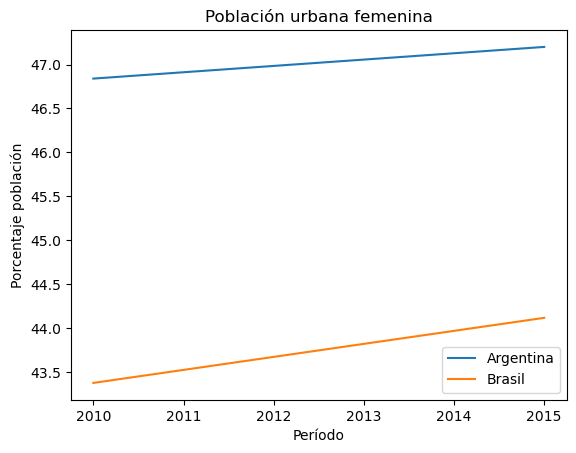

In [268]:
plt.plot(x1, y1, label="Argentina") 
plt.plot(x2, y2, label="Brasil")
plt.xlabel("Período")
plt.ylabel("Porcentaje población")
plt.title("Población urbana femenina")

plt.legend()
plt.show()


In [246]:
y3 = df_argentina["Porcentaje poblacion urbana masculina"]
x3 = df_argentina["date"]
y4 = df_brazil["Porcentaje poblacion urbana masculina"]
x4 = df_brazil["date"]

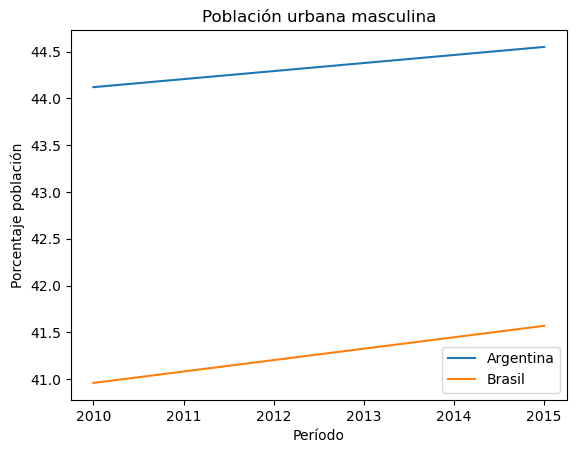

In [264]:
plt.plot(x3, y3, label="Argentina") 
plt.plot(x4, y4, label="Brasil")
plt.xlabel("Período")
plt.ylabel("Porcentaje población")
plt.title("Población urbana masculina")

plt.legend()
plt.show()


In [ ]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

Usamos Página 12: https://web.archive.org/web/20250401132627/https://www.pagina12.com.ar/

In [117]:
pip install beautifulsoup4

In [118]:
pip install requests

In [119]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [123]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [151]:
url = "https://www.pagina12.com.ar/"

In [153]:
r = requests.get(url)
contenido = r.content

In [227]:
html = '''<div class="headlines-group"><div class="columns small-12 medium-6 medium-push-3 "> <div class="headline-card headline-featured-1 moderna"><article><div class="column reverse"><div class="rows xsmall-12 medium-12"><div class="headline-content"><div class="article-title"><div class="element title-prefix"><a href="https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz">En medio de la crisis cambiaria y las negociaciones con el FMI</a></div><h2 class="element title"><a href="https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz">Milei viaja de sorpresa a EE.UU. y busca cruzarse con Trump</a></h2><div class="element title-suffix"><a href="https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz">El Presidente vuelve a sacar su pasaporte y a sumar millas: partirá este miércoles a la noche junto con el ministro Luis Caputo hacia la residencia privada del magnate en Mar a Lago.</a></div></div><div class="time-author-wrapper article-ta "><span class="article-author"><span>Por </span><a class="no-link">Melisa Molina</a></span></div></div></div><div class="rows xsmall-12 medium-12"><div class="multimedia-container"><!-- external_link:  --><a href="https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz"><div class="intrinsic-container"><picture><source media="(width > 768px)" srcset="https://images.pagina12.com.ar/styles/focal_3_2_700x467/public/2025-04/925716-16c-20afp.jpg?h=6f6251cf&amp;itok=IL-aEt_6"><source media="(width <= 768px)" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925716-16c-20afp.jpg?h=6f6251cf&amp;itok=nCnF8EEI"><img class=" image" loading="lazy" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925716-16c-20afp.jpg?h=6f6251cf&amp;itok=nCnF8EEI" alt="Tapa del suplemento"></picture></div></a></div></div></div></article></div></div><div class="columns small-12 medium-3 medium-pull-6"><div class="row headline-featured-1 white-bg moderna "> <div class="headline-card headline-1 "><!-- external_link:  --><article class="headline-card-inner"><div class="block-multimedia"><div class="multimedia-container"><!-- external_link:  --><a href="https://www.pagina12.com.ar/814993-renuncio-el-secretario-de-legal-y-tecnica-y-lo-reemplaza-una"><div class="intrinsic-container"><picture><source media="(width <= 768px)" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925719-sin-20t-c3-adtulo-1.jpg?h=b10b0591&amp;itok=SYdYMt7V"><img class=" image" loading="lazy" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925719-sin-20t-c3-adtulo-1.jpg?h=b10b0591&amp;itok=SYdYMt7V" alt="Tapa del suplemento"></picture></div></a></div></div><div class="block-content"><div class="headline-content"><div class="article-title "><!-- external_link:  --><h2 class="is-display-inline article-title"><a class="p12-separator--right" href="https://www.pagina12.com.ar/814993-renuncio-el-secretario-de-legal-y-tecnica-y-lo-reemplaza-una">Renunció el secretario de Legal y Técnica y lo reemplaza una asesora de Santiago Caputo</a></h2>         <span class="title-prefix"><a href="https://www.pagina12.com.ar/814993-renuncio-el-secretario-de-legal-y-tecnica-y-lo-reemplaza-una">Javier Herrera Bravo dejó su cargo por "motivos personales"</a></span></div><div class="time-author-wrapper article-ta "></div></div></div></article></div></div><div class="row headline-featured-1 white-bg moderna  "> <div class="headline-card headline-1 "><!-- external_link:  --><article class="headline-card-inner"><div class="block-multimedia"><div class="multimedia-container"><!-- external_link:  --><a href="https://www.pagina12.com.ar/814996-macri-y-larreta-una-relacion-con-olor-a-podrido"><div class="intrinsic-container"><picture><source media="(width <= 768px)" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925651-larreta-20-macri-foto-20na-0.jpg?h=b3660f0d&amp;itok=_xO2EzGF"><img class=" image" loading="lazy" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925651-larreta-20-macri-foto-20na-0.jpg?h=b3660f0d&amp;itok=_xO2EzGF" alt="Tapa del suplemento"></picture></div></a><div class="exclusive-teaser"><div class="exclusive-teaser-bg"><span class="exclusive-text">Exclusivo para </span><span class="exclusive-logo"><svg xmlns="http://www.w3.org/2000/svg" width="71" height="15" viewBox="0 0 71 15" fill="none"><path d="M9.51304 7.50294C10.5797 8.15611 11.0279 9.23212 11.0279 10.3838C11.0279 13.0927 8.73475 14.5537 6.21225 14.5537C4.79464 14.5537 3.41526 14.1687 2.46324 13.1305L2.42502 13.1683L2.48409 13.8421C2.48409 14.3028 2.23045 14.5537 1.76486 14.5537C1.21936 14.5537 0.986572 14.2272 0.986572 13.2096C0.986572 12.3055 1.14293 11.7314 1.14293 11.116C1.14293 10.4422 0.986572 9.80966 0.986572 9.21493C0.986572 8.71646 1.24021 8.33144 1.76486 8.33144C2.28952 8.33144 2.54316 8.67865 2.54316 9.17712C2.54316 9.46589 2.50494 9.75466 2.50494 10.0434C2.50494 12.0992 4.09627 13.213 6.03852 13.213C6.75775 13.213 7.67154 13.0583 8.27263 12.6733C8.95364 12.2298 9.36016 11.4048 9.36016 10.5969C9.36016 8.79209 8.00162 8.46551 6.46589 8.21455C5.43743 8.04267 4.0372 7.81234 3.10603 7.34824C1.97681 6.79477 1.31665 5.66031 1.31665 4.54648C1.31665 3.37422 1.82046 2.33602 2.71341 1.60722C3.62721 0.874978 4.81202 0.624023 5.95861 0.624023C7.16426 0.624023 8.30738 0.950609 9.12389 1.85473V1.58659C9.12389 1.18437 9.2594 0.799348 9.72498 0.799348C10.2496 0.799348 10.4234 1.22219 10.4234 1.66566C10.4234 2.31883 10.267 2.95481 10.267 3.60798C10.267 4.26115 10.4234 4.81807 10.4234 5.29935C10.4234 5.78063 10.267 6.25848 9.66592 6.25848C9.17948 6.25848 8.88762 5.93189 8.88762 5.47124C8.88762 5.16528 8.94669 4.83869 8.94669 4.51211C8.94669 2.70729 7.49087 1.97505 5.85785 1.97505C4.4194 1.97505 2.98442 2.70386 2.98442 4.31959C2.98442 5.76001 3.97466 6.22066 6.42072 6.62632C7.47002 6.7982 8.59577 6.9529 9.50956 7.50982L9.51304 7.50294Z" fill="#FBFBFB"></path><path d="M12.6409 7.5992C12.6409 3.93113 14.3086 0.624023 18.485 0.624023C20.2118 0.624023 21.7267 1.21875 22.7969 2.58353C23.7489 3.81425 24.2145 5.79095 24.2145 7.27261C24.2145 8.75428 23.8844 10.731 23.0088 12.0751C21.9804 13.6909 20.2709 14.5537 18.3495 14.5537C14.253 14.5537 12.6409 11.0576 12.6409 7.5992ZM21.7094 11.0576C22.2549 10.0194 22.4286 8.40707 22.4286 7.36887C22.4286 6.25504 22.234 4.75619 21.5947 3.73862C20.9137 2.62479 19.8088 2.00943 18.4885 1.97162C15.2051 2.00943 14.4302 5.1034 14.4302 7.67826C14.4302 8.7749 14.6248 10.2909 15.2641 11.367C15.9451 12.4636 17.0327 13.213 18.353 13.213C19.8296 13.213 21.0527 12.3467 21.7128 11.061L21.7094 11.0576Z" fill="#FBFBFB"></path><path d="M34.8382 11.9243C35.3629 11.2505 35.4776 10.5596 35.4776 9.79294C35.4776 9.27384 35.6339 8.88882 36.235 8.88882C36.8361 8.88882 37.0515 9.23603 37.0515 9.77232C37.0515 12.7116 34.7027 14.5576 31.7876 14.5576C27.7468 14.5576 25.8462 11.3296 25.8462 7.77499C25.8462 6.17988 26.2145 4.31662 27.2047 2.95184C28.2714 1.45299 29.9635 0.62793 31.8085 0.62793C33.3025 0.62793 34.5464 1.08859 35.422 2.24367L35.4602 2.20585C35.4393 1.91708 35.3837 1.61112 35.3837 1.32235C35.3837 0.957953 35.6165 0.669183 36.0057 0.669183C36.4713 0.669183 36.6867 1.05421 36.6867 1.49424C36.6867 2.26429 36.5512 3.06872 36.5512 3.83878C36.5512 4.64665 36.6867 5.262 36.6867 5.85673C36.6867 6.37583 36.3775 6.60616 35.9501 6.60616C35.2691 6.60616 35.1926 6.33801 35.1926 5.41326C35.1926 4.72228 35.1544 4.04848 34.7062 3.35749C34.1051 2.41555 32.9794 1.97552 31.8918 1.97552C28.6501 1.97552 27.639 4.8976 27.639 7.56873C27.639 10.2398 28.6675 13.2169 31.9301 13.2169C33.0176 13.2169 34.1642 12.8147 34.8417 11.9278L34.8382 11.9243Z" fill="#FBFBFB"></path><path d="M40.8776 5.23737C40.8776 4.62202 40.9158 3.41193 40.7803 2.85502C40.6621 2.35655 40.3321 2.14341 39.8283 2.14341C39.519 2.14341 39.2063 2.23966 38.8971 2.23966C38.5288 2.23966 38.2751 1.95089 38.2751 1.58649C38.2751 1.12584 38.6817 0.895508 39.109 0.895508C39.9846 0.895508 40.7212 1.10521 41.7114 1.10521C42.7017 1.10521 43.5182 0.895508 44.3139 0.895508C44.7412 0.895508 45.1477 1.12584 45.1477 1.58649C45.1477 1.95089 44.8941 2.23966 44.5258 2.23966C44.2166 2.23966 43.9039 2.14341 43.5946 2.14341C43.0908 2.14341 42.7607 2.35311 42.6426 2.85502C42.5245 3.41193 42.5453 4.62202 42.5453 5.23737V9.94364C42.5453 10.559 42.5071 11.7691 42.6426 12.326C42.7781 12.8245 43.0908 13.0376 43.5946 13.0376C43.9039 13.0376 44.2166 12.9413 44.5258 12.9413C44.8941 12.9413 45.1477 13.2301 45.1477 13.5945C45.1477 14.0552 44.7412 14.2855 44.3139 14.2855C43.3827 14.2855 42.7017 14.0758 41.7114 14.0758C40.7212 14.0758 40.061 14.2855 39.109 14.2855C38.6817 14.2855 38.2751 14.0552 38.2751 13.5945C38.2751 13.2301 38.5288 12.9413 38.8971 12.9413C39.2063 12.9413 39.519 13.0376 39.8283 13.0376C40.3321 13.0376 40.6621 12.8279 40.7803 12.326C40.9158 11.7691 40.8776 10.559 40.8776 9.94364V5.23737Z" fill="#FBFBFB"></path><path d="M69.3509 7.50294C70.4176 8.15611 70.8658 9.23212 70.8658 10.3838C70.8658 13.0927 68.5726 14.5537 66.0501 14.5537C64.6325 14.5537 63.2532 14.1687 62.3011 13.1305L62.2629 13.1683L62.322 13.8421C62.322 14.3028 62.0683 14.5537 61.6028 14.5537C61.0573 14.5537 60.8245 14.2272 60.8245 13.2096C60.8245 12.3055 60.9808 11.7314 60.9808 11.116C60.9808 10.4422 60.8245 9.80966 60.8245 9.21493C60.8245 8.71646 61.0781 8.33144 61.6028 8.33144C62.1274 8.33144 62.381 8.67865 62.381 9.17712C62.381 9.46589 62.3428 9.75466 62.3428 10.0434C62.3428 12.0992 63.9342 13.213 65.8764 13.213C66.5956 13.213 67.5094 13.0583 68.1105 12.6733C68.7915 12.2298 69.1981 11.4048 69.1981 10.5969C69.1981 8.79209 67.8395 8.46551 66.3038 8.21455C65.2753 8.04267 63.8751 7.81234 62.9439 7.34824C61.8182 6.79133 61.158 5.65687 61.158 4.54305C61.158 3.37078 61.6618 2.33258 62.5548 1.60378C63.4686 0.874978 64.6534 0.624023 65.7965 0.624023C67.0022 0.624023 68.1453 0.950609 68.9618 1.85473V1.58659C68.9618 1.18437 69.0973 0.799348 69.5629 0.799348C70.0875 0.799348 70.2613 1.22219 70.2613 1.66566C70.2613 2.31883 70.1049 2.95481 70.1049 3.60798C70.1049 4.26115 70.2613 4.81807 70.2613 5.29935C70.2613 5.78063 70.1049 6.25848 69.5038 6.25848C69.0174 6.25848 68.7255 5.93189 68.7255 5.47124C68.7255 5.16528 68.7846 4.83869 68.7846 4.51211C68.7846 2.70729 67.3288 1.97505 65.6957 1.97505C64.2573 1.97505 62.8223 2.70386 62.8223 4.31959C62.8223 5.76001 63.8125 6.22066 66.2586 6.62632C67.3079 6.7982 68.4337 6.9529 69.3475 7.50982L69.3509 7.50294Z" fill="#FBFBFB"></path><path d="M53.747 0.486816C49.2545 0.486816 45.5298 4.13426 45.5298 8.52081C45.5298 12.0307 48.2886 14.6228 51.8534 14.6228C53.271 14.6228 54.7303 14.1759 55.9325 13.454C56.346 13.1996 57.3119 12.5945 57.3119 12.0686C57.3119 11.8142 57.1347 11.6595 56.8776 11.6595C56.6621 11.6595 56.3077 11.9139 56.1479 12.0101C54.9249 12.8696 53.5872 13.454 52.048 13.454C49.112 13.454 47.0829 11.2298 47.0829 8.40393C47.0829 4.95244 49.9216 1.58002 53.5872 1.58002C56.1479 1.58002 57.8817 3.43296 57.8817 5.88751C57.8817 6.93945 57.5481 8.18735 56.954 9.10523C56.6587 9.53495 55.929 10.2569 55.3383 10.2569C55.043 10.2569 54.9388 9.99217 54.9388 9.69996C54.9388 9.55557 54.9457 9.07085 54.9527 8.67207L54.9978 6.70225C55.0117 5.84281 54.911 5.06932 54.2022 4.52616C53.6532 4.11019 52.8992 3.95206 52.2182 3.95206C51.5824 3.95206 50.8284 4.12394 50.3072 4.48147C49.8139 4.82524 49.4108 5.3409 49.4108 5.95626C49.4108 6.47192 49.8034 6.87414 50.3072 6.87414C50.7138 6.87414 51.089 6.63006 51.089 6.20034C51.089 5.69843 50.7416 5.68468 50.7416 5.61249C50.7416 5.45435 50.957 5.30997 51.0751 5.24121C51.3948 5.05557 51.8152 4.92494 52.1904 4.92494C53.0452 4.92494 53.8269 5.25496 53.8269 6.21409C53.8269 7.27291 52.6838 7.25916 51.8152 7.34511C51.1064 7.43105 50.5122 7.48949 49.8764 7.86077C49.2093 8.24923 48.8931 8.87834 48.8931 9.67933C48.8931 10.3944 49.2684 11.0132 49.8625 11.3845C50.3698 11.7007 50.9917 11.8004 51.5859 11.8004C52.4198 11.8004 53.2363 11.5667 53.7644 10.941C54.0111 11.2676 54.4836 11.4291 54.911 11.4291C56.2521 11.4291 57.4126 10.4356 58.1214 9.40088C58.9102 8.3283 59.3827 7.00133 59.3827 5.69499C59.3827 2.49789 56.8984 0.490254 53.747 0.490254V0.486816ZM51.5998 10.8241C50.8319 10.8241 50.0953 10.4803 50.0953 9.62089C50.0953 8.63082 51.023 8.44518 51.7909 8.37299C52.4858 8.3008 53.2814 8.2733 53.8165 7.75764C53.8026 8.05672 53.7887 8.37299 53.7887 8.67551C53.7887 9.17742 53.7435 9.62089 53.4274 10.0644C52.993 10.6247 52.2842 10.8241 51.6032 10.8241H51.5998Z" fill="#FBFBFB"></path></svg></span></div></div></div></div><div class="block-content"><div class="headline-content"><div class="headline-plaque headline-suplement-"></div><div class="article-title "><!-- external_link:  --><h2 class="is-display-inline article-title"><a class="p12-separator--right" href="https://www.pagina12.com.ar/814996-macri-y-larreta-una-relacion-con-olor-a-podrido">Macri y Larreta, una relación con olor a podrido</a></h2>         <span class="title-prefix"><a href="https://www.pagina12.com.ar/814996-macri-y-larreta-una-relacion-con-olor-a-podrido">Tras 20 años de trabajar juntos, los exsocios del PRO se sacan chispas en público</a></span></div><div class="time-author-wrapper article-ta "><span class="article-author"><span>Por </span><a href="https://www.pagina12.com.ar/autores/1246-werner-pertot">Werner Pertot</a></span></div></div></div></article></div></div></div><div class="columns small-12 medium-3"><div class="row headline-featured-1 white-bg moderna  "> <div class="headline-card headline-1 "><!-- external_link:  --><article class="headline-card-inner"><div class="block-multimedia"><div class="multimedia-container"><!-- external_link:  --><a href="https://www.pagina12.com.ar/815009-suben-en-abril-la-luz-y-el-gas"><div class="intrinsic-container"><picture><source media="(width <= 768px)" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925711-46546-gas-2520ok.jpg?h=b3660f0d&amp;itok=KFYrU6l0"><img class=" image" loading="lazy" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925711-46546-gas-2520ok.jpg?h=b3660f0d&amp;itok=KFYrU6l0" alt="Tapa del suplemento"></picture></div></a></div></div><div class="block-content"><div class="headline-content"><div class="article-title "><!-- external_link:  --><h2 class="is-display-inline article-title"><a class="p12-separator--right" href="https://www.pagina12.com.ar/815009-suben-en-abril-la-luz-y-el-gas">La luz y el gas suben en abril</a></h2>         <span class="title-prefix"><a href="https://www.pagina12.com.ar/815009-suben-en-abril-la-luz-y-el-gas">Autorizaron aumentos de hasta el 1,8 por ciento</a></span></div><div class="time-author-wrapper article-ta "><span class="article-author"><span>Por </span><a href="https://www.pagina12.com.ar/autores/494456-mara-pedrazzoli">Mara Pedrazzoli</a></span></div></div></div></article></div></div><div class="row headline-featured-1 white-bg moderna  "> <div class="headline-card headline-1 "><!-- external_link:  --><article class="headline-card-inner"><div class="block-multimedia"><div class="multimedia-container"><!-- external_link:  --><a href="https://www.pagina12.com.ar/814883-dolar-blue-dolar-hoy-a-cuanto-cotizan-el-martes-1-de-abril-d"><div class="intrinsic-container"><picture><source media="(width <= 768px)" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925589-img-2532.JPG?h=c6980913&amp;itok=lvMWoUwt"><img class=" image" loading="lazy" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2025-04/925589-img-2532.JPG?h=c6980913&amp;itok=lvMWoUwt" alt="Tapa del suplemento"></picture></div></a></div></div><div class="block-content"><div class="headline-content"><div class="article-title "><!-- external_link:  --><h2 class="is-display-inline article-title"><a class="p12-separator--right" href="https://www.pagina12.com.ar/814883-dolar-blue-dolar-hoy-a-cuanto-cotizan-el-martes-1-de-abril-d">🔴 En vivo. La cotización del dólar este martes</a></h2>         <span class="title-prefix"><a href="https://www.pagina12.com.ar/814883-dolar-blue-dolar-hoy-a-cuanto-cotizan-el-martes-1-de-abril-d">A cuánto cerró para la compra y la venta</a></span></div><div class="time-author-wrapper article-ta "></div></div></div></article></div></div></div></div>'''

In [229]:
soup = BeautifulSoup(html, 'html.parser')
soup

<div class="headlines-group"><div class="columns small-12 medium-6 medium-push-3"> <div class="headline-card headline-featured-1 moderna"><article><div class="column reverse"><div class="rows xsmall-12 medium-12"><div class="headline-content"><div class="article-title"><div class="element title-prefix"><a href="https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz">En medio de la crisis cambiaria y las negociaciones con el FMI</a></div><h2 class="element title"><a href="https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz">Milei viaja de sorpresa a EE.UU. y busca cruzarse con Trump</a></h2><div class="element title-suffix"><a href="https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz">El Presidente vuelve a sacar su pasaporte y a sumar millas: partirá este miércoles a la noche junto con el ministro Luis Caputo hacia la residencia privada del magnate en Mar a L

In [231]:
noticias = soup.find_all('div', class_='headline-card')

In [245]:
resultados = []
for noticia in noticias:
    titulo = noticia.find('h2', class_='element title')
    if titulo:
        titulo_texto = titulo.get_text(strip=True)
    
        
        enlace = titulo.find('a')
        if enlace:
            enlace_url = enlace['href']
    
        resultados.append({
            'titulo': titulo_texto,
            'enlace': enlace_url
        })


In [247]:
for resultado in resultados:
    print(f"Título: {resultado['titulo']}")
    print(f"Enlace: {resultado['enlace']}")
    print("-" * 80)

Título: Milei viaja de sorpresa a EE.UU. y busca cruzarse con Trump
Enlace: https://www.pagina12.com.ar/814984-javier-milei-viaja-de-sorpresa-a-estados-unidos-y-busca-cruz
--------------------------------------------------------------------------------


In [249]:
df_links = pd.DataFrame(news_links, columns=["Links de Noticias"])

In [251]:
df_links.to_excel("noticias_links_pagina12.xlsx", index=False)
